In [43]:
import numpy as np 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
df = sns.load_dataset("iris")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [32]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

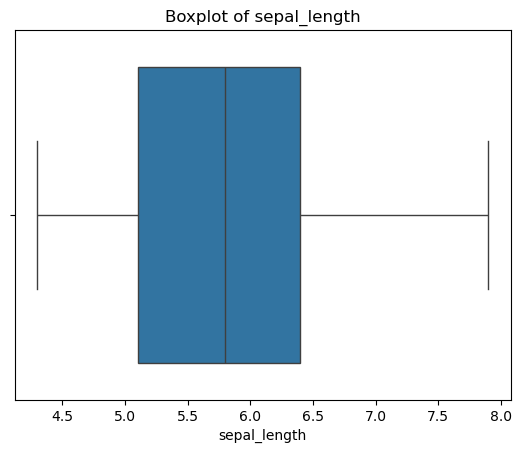

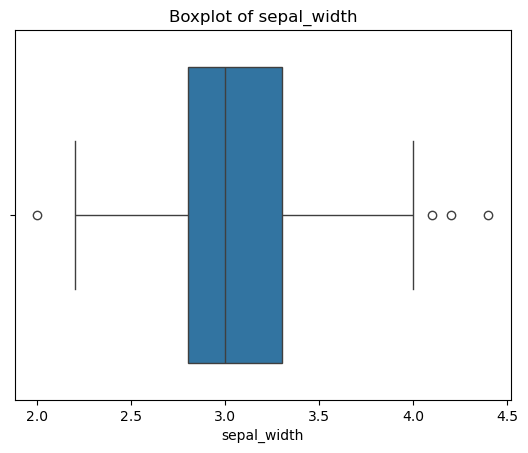

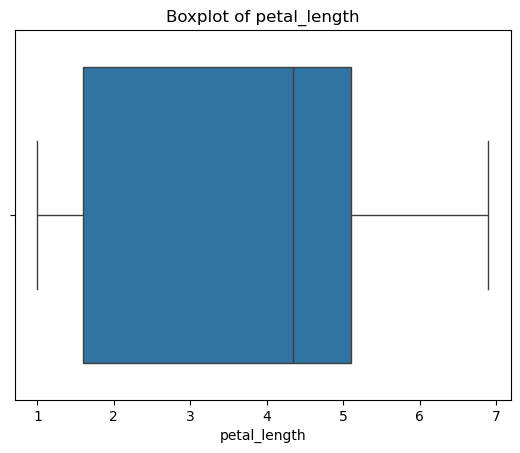

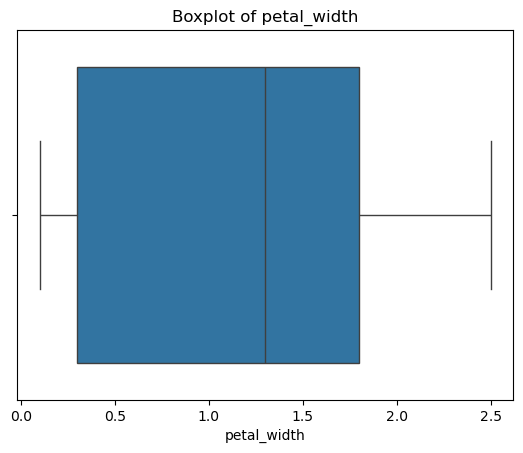

In [33]:
numeric_df = df.select_dtypes(include=['number','float'])
for col in numeric_df.columns:
    sns.boxplot(x=numeric_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
X = df.drop(columns=['species'])
y = df['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [48]:
y_pred = knn.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN Model Performance (k=5):")
print(f"Accuracy {accuracy:.4f}")


KNN Model Performance (k=5):
Accuracy 0.9667


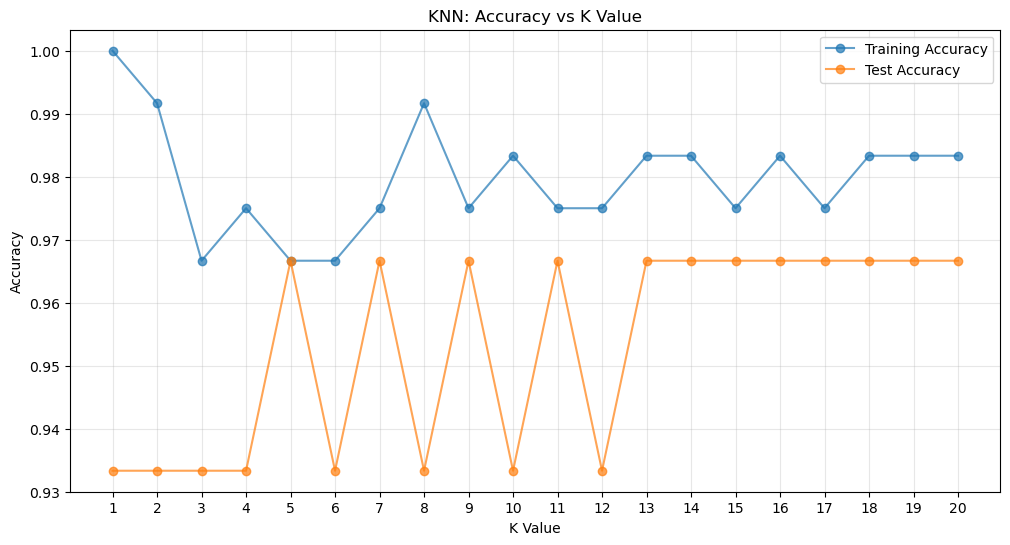

In [50]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

K_values = range(1, 21)
train_score = []
test_score = []

for k in K_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(K_values, train_score, 'o-', label='Training Accuracy', alpha=0.7)
plt.plot(K_values, test_score, 'o-', label='Test Accuracy', alpha=0.7)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(K_values)
plt.show()
